In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, \
                            PrecisionRecallDisplay, RocCurveDisplay

In [2]:
data_1 = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
data_1.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


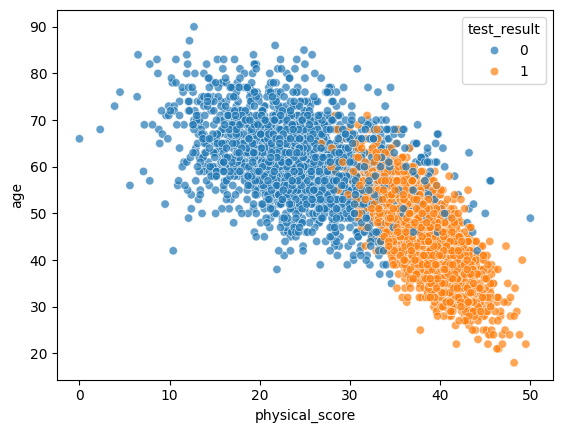

In [4]:
sns.scatterplot(data_1, x='physical_score', y='age', hue='test_result', alpha=0.7);

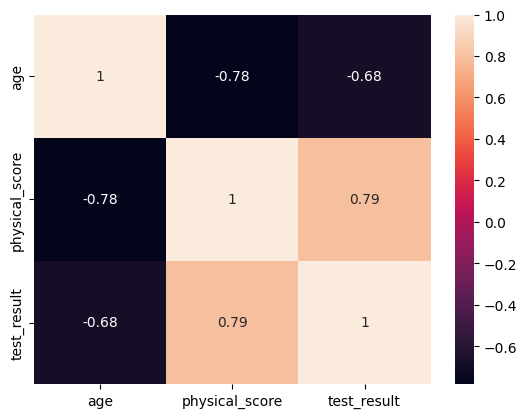

In [5]:
sns.heatmap(data_1.corr(), annot=True);

In [6]:
X = data_1.drop('test_result', axis=1)
y = data_1['test_result']

In [7]:
#Логистическая регрессия без кросс-валидации

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_predict = model.predict(X_test)

In [15]:
#Метрики оценки модели классификации (ROC-кривая)

In [16]:
accuracy_score(y_test, y_predict)

0.93

In [17]:
confusion_matrix(y_test, y_predict)

array([[172,  21],
       [ 14, 293]], dtype=int64)

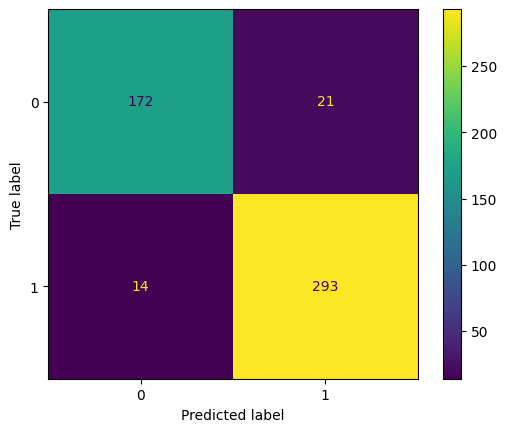

In [18]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [19]:
print(classification_report(y_test, y_predict)) #precision - как часто мы правильно классифицируем случаи из 
                                                #этого класса из всего набора значений этого класса
                                                #recall - как часто мы находим значения этого класса из всего
                                                #набора значений этого класса

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



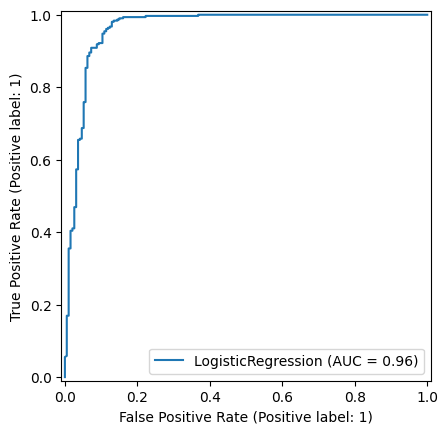

In [22]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

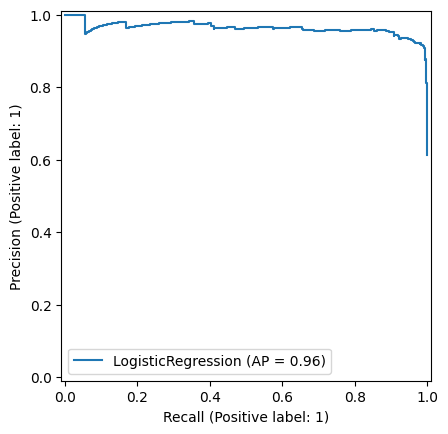

In [23]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)